# Statistiques descriptives

# Description univariée

## 1 Préambule

### 1.3 Types des variables

Code postal de résidence : qualitative ordinale

Taille en cm : quantitative continue

Série du bac : qualitative nominale

Moyenne au S1 : quantitative continue

Satisfaction à propos de la formation : qualitative ordinale (quantitative discrète peut marcher aussi)

## 2 Préparation des données

### Modification d'une série

In [1]:
def where_none(dat: list):
    indexes = []
    for i in range(len(dat)):
        if dat[i] is None:
            indexes.append(i)
    return indexes

In [2]:
def remove_data(dat: list, pos: list):
    new_dat = []
    for i in range(len(dat)):
        if i not in pos:
            new_dat.append(dat[i])
    return new_dat

In [3]:
def replace_value(dat: list, value: list, repvalue: list):
    ndat = []
    for elt in dat:
        for i in range(len(value)):
            if elt == value[i]:
                elt = repvalue[i]
        ndat.append(elt)
    return ndat

In [4]:
data1 = [11,5,6,7,5,2,3,6,None,1,2,5,4,9,6,3,5,8,None]
data2 = ["toto","toto","tata","toto","titi","toto","tata","tata"]
data3 = [None, "None"]

print(where_none(data1))

[8, 18]


In [5]:
print(where_none(data2))

[]


In [6]:
print(where_none(data3))

[0]


In [7]:
print(remove_data(data1,where_none(data1)))

[11, 5, 6, 7, 5, 2, 3, 6, 1, 2, 5, 4, 9, 6, 3, 5, 8]


In [8]:
print(data1)
data11 = replace_value(data1,[8,11,None],[-8,-11,0])
print(data11)

[11, 5, 6, 7, 5, 2, 3, 6, None, 1, 2, 5, 4, 9, 6, 3, 5, 8, None]
[-11, 5, 6, 7, 5, 2, 3, 6, 0, 1, 2, 5, 4, 9, 6, 3, 5, -8, 0]


### Discrétisation

In [9]:
# Générons des données aléatoires (des float arrondis à 10^-2 entre 0 et 20)
import random
data = [round(random.random()*20,2) for _ in range(10)]
print(data)

[15.49, 7.23, 12.71, 2.99, 15.03, 15.77, 4.13, 1.5, 1.19, 20.0]


In [10]:
def cut(dat: list, split: list):
    cdat = []
    for elt in dat:
        i = 0
        while elt > split[i]:
            i += 1
        cdat.append(f'({split[i-1]},{split[i]}]')
    return cdat

In [11]:
# Discrétisation
data = [16.52, 3.38, 3.43, 11.25, 3.16, 17.96, 9.7, 2.17, 3.87, 5.69]
cut(dat=data, split=[0,5,10,15,20])

['(15,20]',
 '(0,5]',
 '(0,5]',
 '(10,15]',
 '(0,5]',
 '(15,20]',
 '(5,10]',
 '(0,5]',
 '(0,5]',
 '(5,10]']

# 3 Statistiques univariées

### 3.1 Distribution groupée

In [12]:
def get_gdistr(data: list):
    return {e: (data.count(e), data.count(e)/len(data)) for e in list(set(data))}

In [13]:
# Fonction pour un plus chouette affichage
def pprint_gd(gd):
    mod_max_size  = max([len(str(m)) for m in gd.keys()]+[len("Modalité")])
    eff_max_size  = max([len(str(gd[m][0])) for m in gd.keys()]+[len("Effectif")])
    freq_max_size = max([len(str(gd[m][1])) for m in gd.keys()]+[len("Fréquence")])
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    print("Modalité".ljust(mod_max_size+3,' ')+"Effectif".rjust(eff_max_size+3,' ')+"Fréquence".rjust(freq_max_size+3,' '))
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    for k in gd.keys():
        print(str(k).ljust(mod_max_size+3,' ')+str(gd[k][0]).rjust(eff_max_size+3,' ')+str(gd[k][1]).rjust(freq_max_size+3,' '))
    return None

In [14]:
# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

In [15]:
# Construction de la ditribution groupée
gd_data = get_gdistr(data)

# Affichage
print(gd_data)

{'tata': (6, 0.3), 'toto': (11, 0.55), 'titi': (3, 0.15)}


In [16]:
pprint_gd(gd_data)

----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
tata                 6         0.3
toto                11        0.55
titi                 3        0.15


In [17]:
# Générons des données aléatoires (des float arrondis à 10^-2 entre 0 et 20)
import random
data = [round(random.random()*20,2) for _ in range(10)]
print("Données initiales : ",data,"\n")
data2 = cut(dat=data, split=[0,5,10,15,20])
print("Données dicrétisées : ",data2,"\n")
print("Tableau de la distribution groupée :")
pprint_gd(get_gdistr(data2))

Données initiales :  [12.7, 9.12, 6.69, 19.23, 3.88, 12.24, 10.14, 16.55, 18.72, 11.41] 

Données dicrétisées :  ['(10,15]', '(5,10]', '(5,10]', '(15,20]', '(0,5]', '(10,15]', '(10,15]', '(15,20]', '(15,20]', '(10,15]'] 

Tableau de la distribution groupée :
----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
(15,20]              3         0.3
(0,5]                1         0.1
(5,10]               2         0.2
(10,15]              4         0.4


### 3.2 Distribution d'une variable quantitative

In [18]:
def mean(dat: list):
    return sum(dat)/len(dat)

In [19]:
def quantile(dat: list, p: float):
    sdat = sorted(dat)
    i = round(p*(len(sdat)))
    return sdat[i]

In [20]:
def median(dat: list):
    return quantile(dat, 0.5)

In [21]:
from math import sqrt

def stdev(dat: list):
    st_sum = 0
    for i in range(len(dat)):
        st_sum += abs(mean(dat) - dat[i])**2
    return sqrt(st_sum/len(dat))

In [22]:
def cofvar(dat: list):
    return stdev(dat) / mean(dat)

In [23]:
def valrange(dat: list):
    return max(dat) - min(dat)

In [24]:
def iquarange(dat: list):
    return quantile(dat, 0.75) - quantile(dat, 0.25)

In [27]:
# Génération de données aléatoires
import random
data = [round(random.random()*20,2) for _ in range(25)]
print(data)

# Affichage des inficateurs
print("Moyenne         : ",round(mean(data),2))
print("Médiane         : ",round(median(data),2))
print("Écart-type      : ",round(stdev(data),2))
print("Coef. de var.   : ",round(cofvar(data),2))
print("Étendue         : ",round(valrange(data),2))
print("Éc. interquart. : ",round(iquarange(data),2))
print("Prem.  quartile : ",round(quantile(data,0.25),2))
print("Trois. quartile : ",round(quantile(data,0.75),2))

[3.87, 15.7, 3.66, 18.0, 5.43, 11.44, 18.9, 19.85, 3.41, 17.91, 18.19, 5.55, 17.95, 19.27, 12.52, 12.3, 17.46, 5.19, 14.4, 6.57, 7.42, 6.24, 7.16, 5.87, 14.01]
Moyenne         :  11.53
Médiane         :  12.3
Écart-type      :  5.8
Coef. de var.   :  0.5
Étendue         :  16.44
Éc. interquart. :  12.08
Prem.  quartile :  5.87
Trois. quartile :  17.95


In [28]:
def pearson(dat: list):
    return 3*(mean(dat)-median(dat))/stdev(dat)

In [29]:
print("Pearson         : ",round(pearson(data)))

Pearson         :  0


In [30]:
def kurtosis(dat: list):
    st_sum = 0
    for i in range(len(dat)):
        st_sum += abs(mean(dat) - dat[i])**4
    st_sum /= len(dat)
    stdev_dat = stdev(dat)
    return st_sum / (stdev_dat)**4

In [31]:
print("Kurtosis        : ",round(kurtosis(data)))

Kurtosis        :  1


### 3.3 Représentations graphiques

In [32]:
import matplotlib.pyplot as plt
# Si vous voulez augmenter la qualité des images produites :
plt.rcParams['figure.dpi']= 300

#### 3.3.1 Diagramme à barre

In [33]:
# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

# Extraction de la distribution groupée
data_gd = get_gdistr(data)

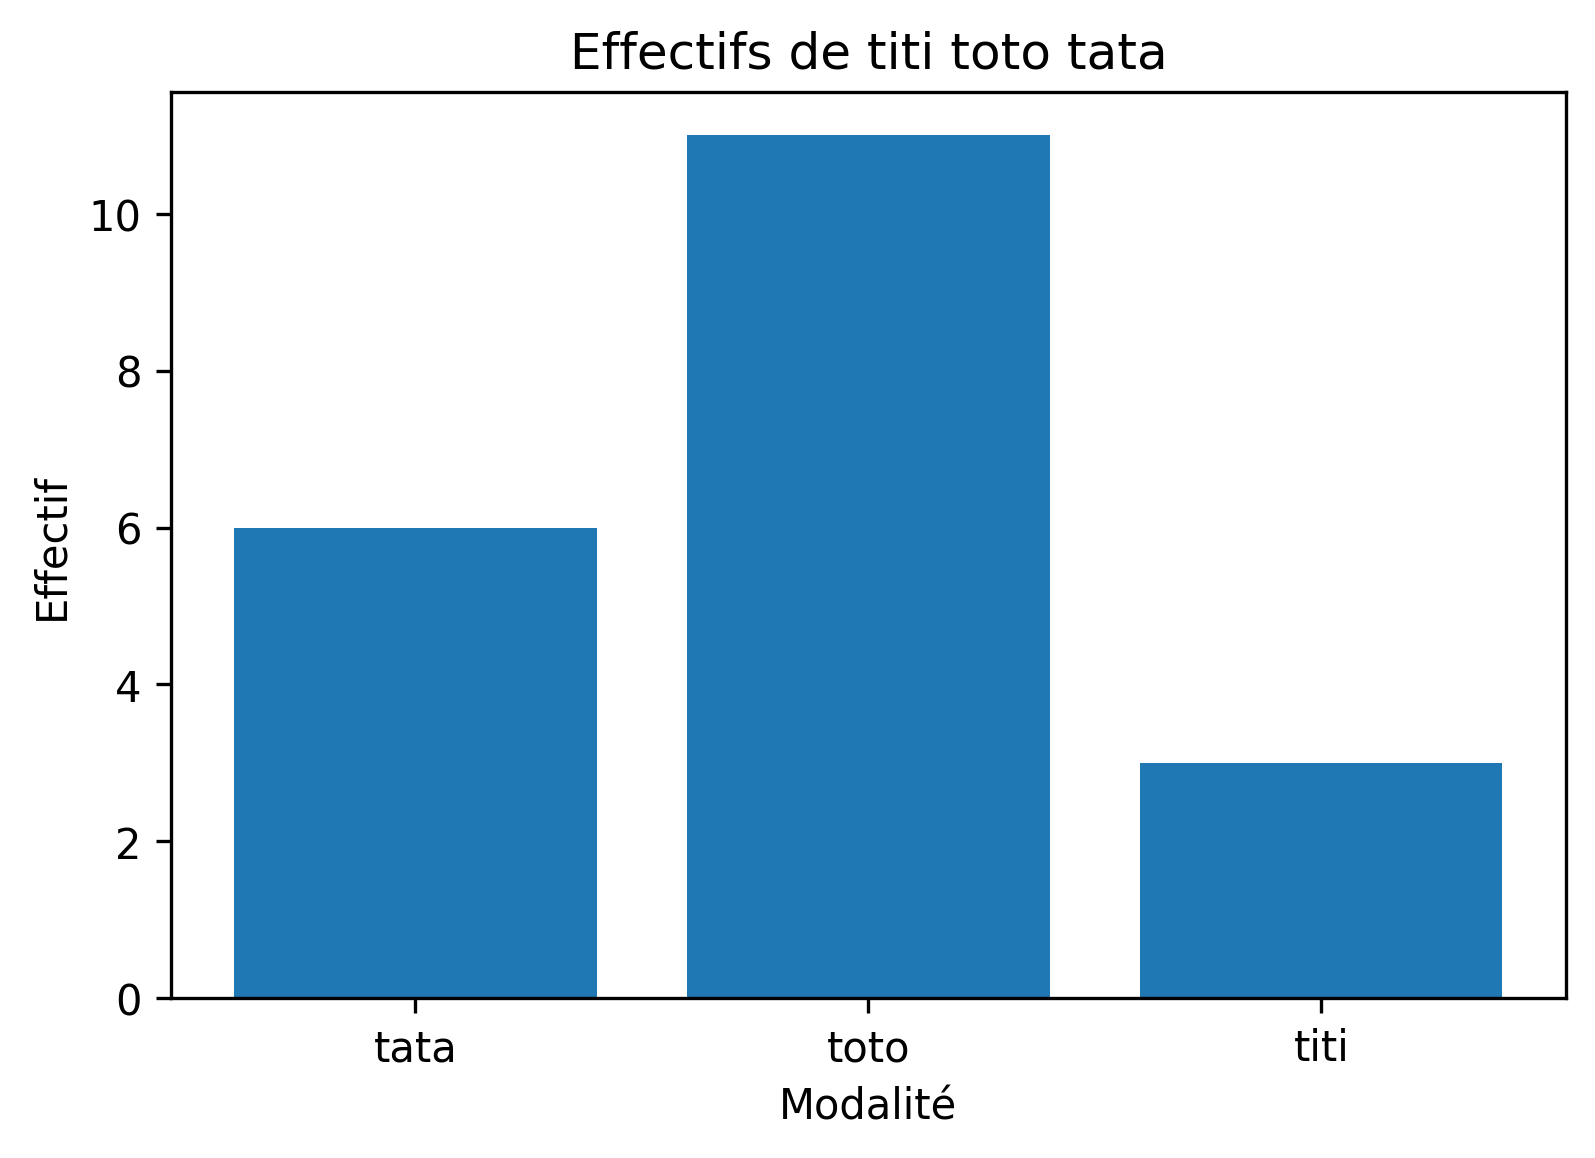

In [34]:
# On récupère les modalités
classes = list(data_gd.keys())
# On récupère les effectifs pour s'en servir comme hauteurs des barres
heights = [data_gd[c][0] for c in classes]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Effectifs de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
# Affichage
plt.show()

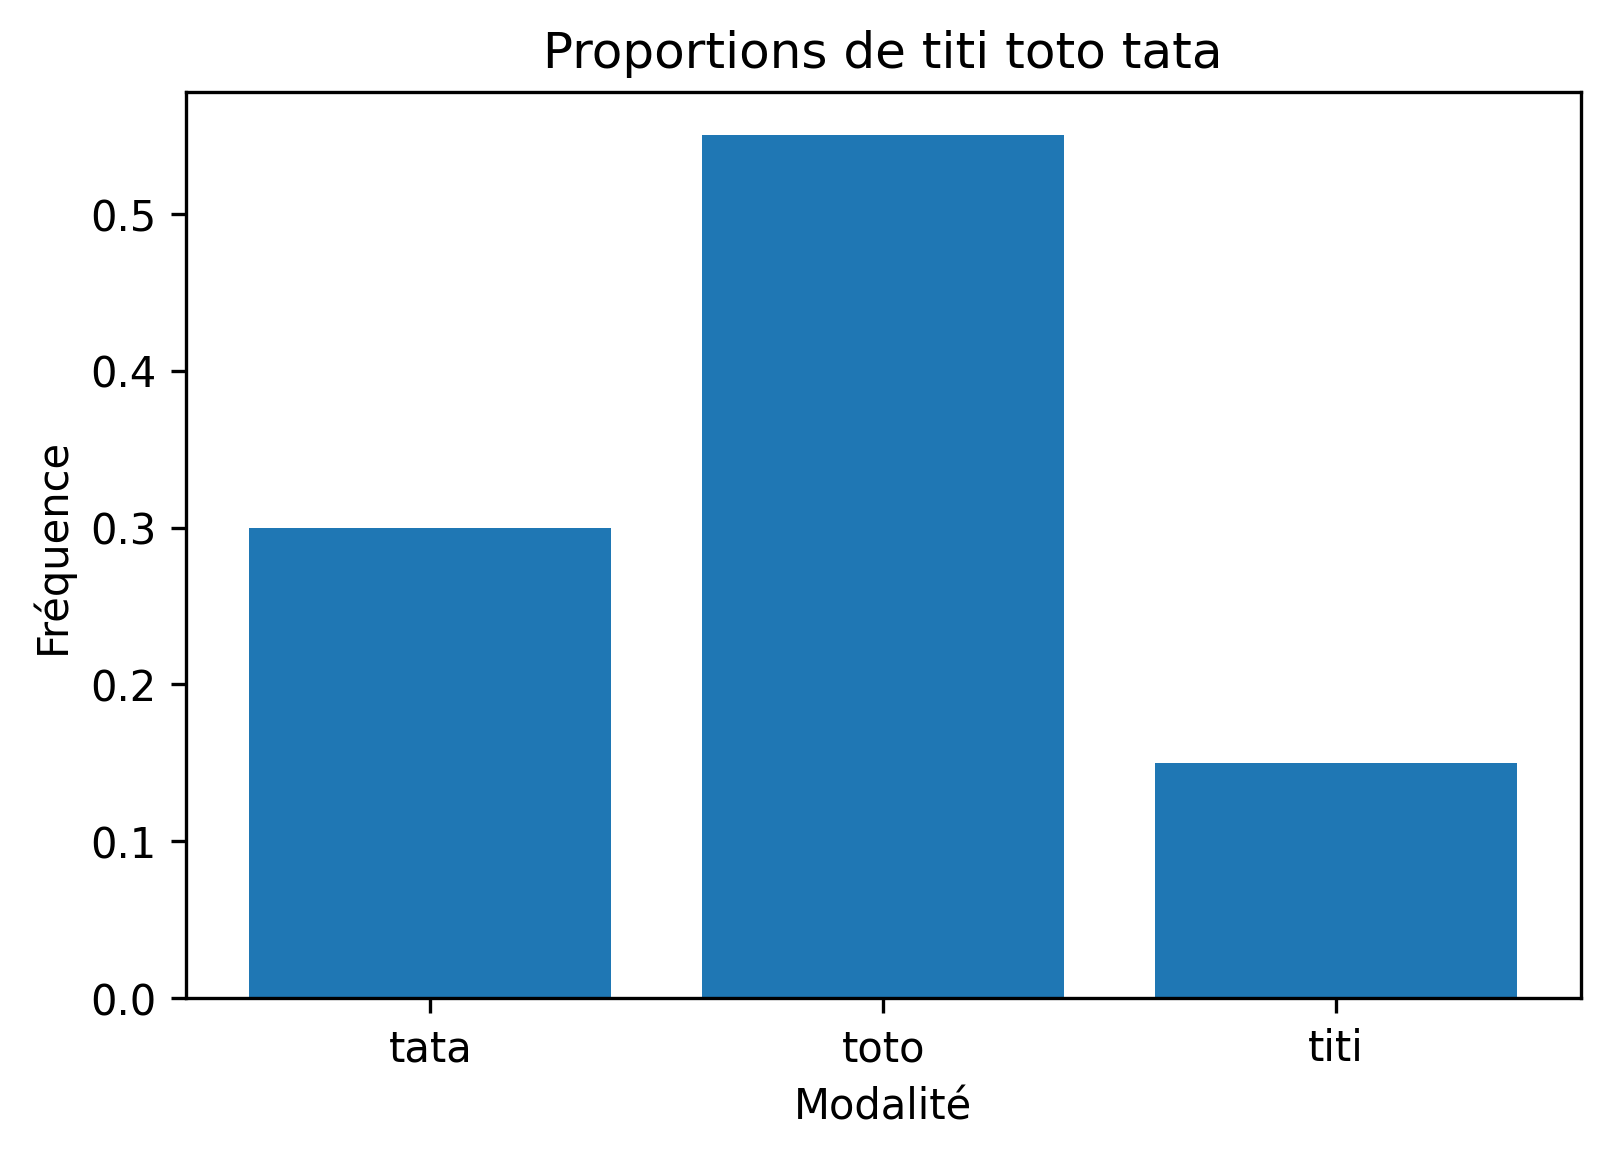

In [35]:
# On récupère les fréquences pour s'en servir comme hauteurs des barres
heights = [data_gd[c][1] for c in classes]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Fréquence")
# Affichage
plt.show()

#### 3.3.2 Diagramme à secteurs

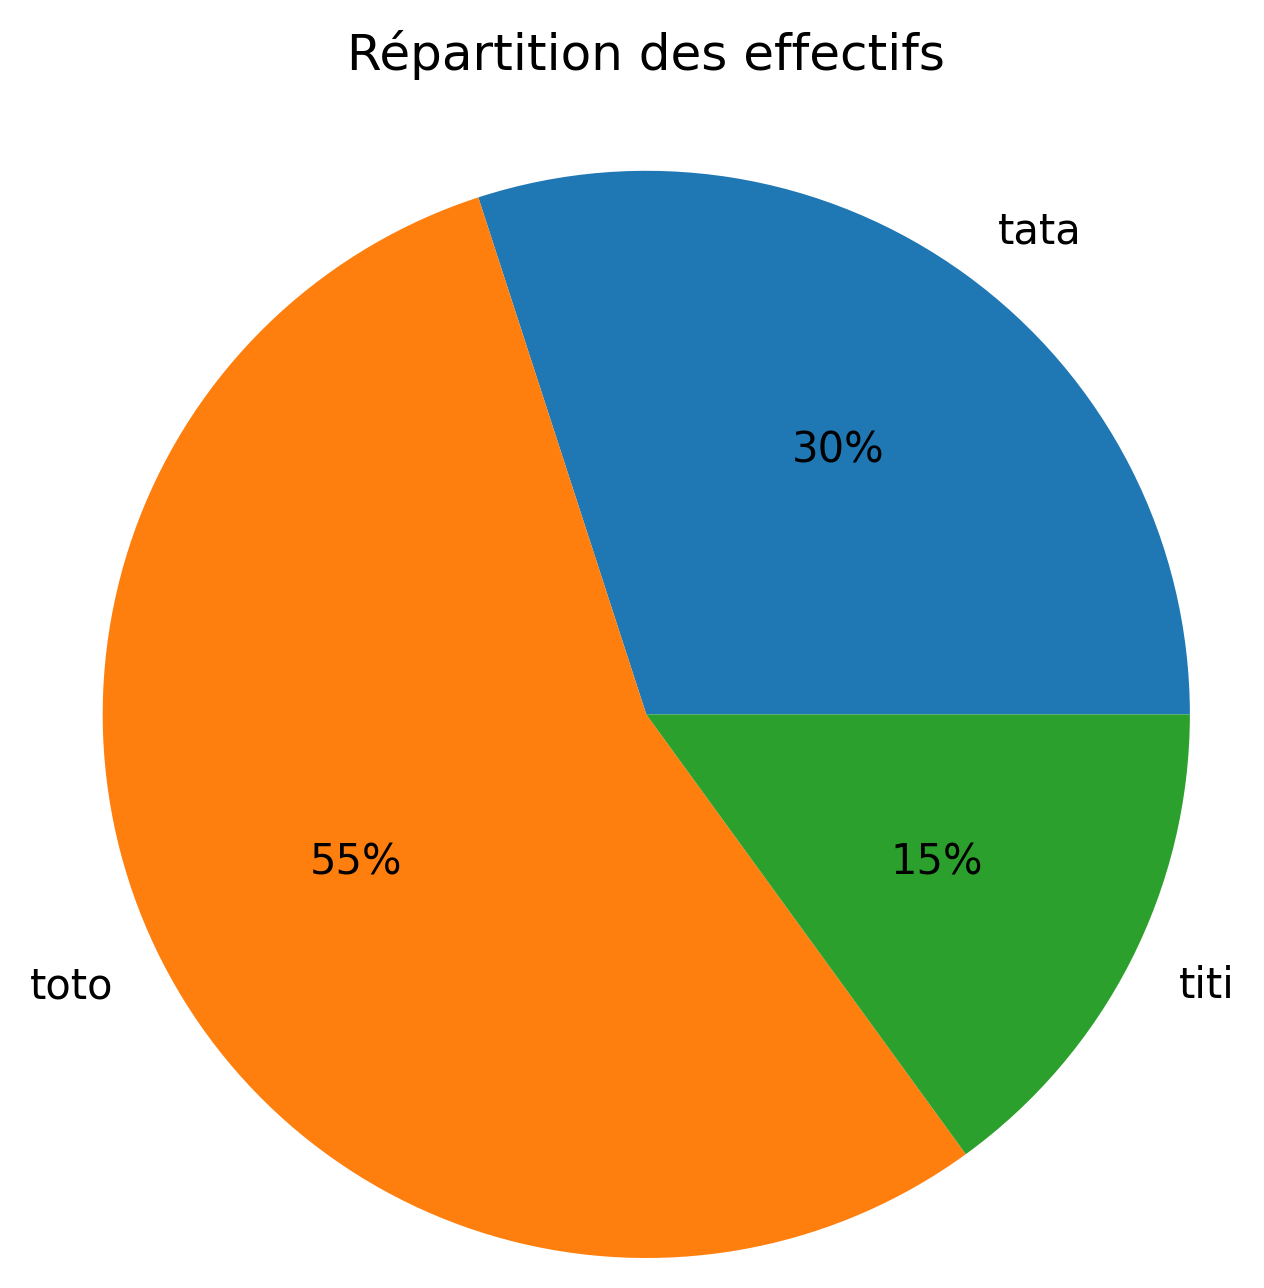

In [36]:
# On récupère les fréquences dans le tableau de la distribution groupé
props = [data_gd[c][1] for c in classes]
# PRoduction du graphique
plt.figure()
plt.title('Répartition des effectifs\n\n\n')
plt.pie(props, labels=classes,
        autopct='%.0f%%',
        radius=1.5)
# Affichage
plt.show()

#### 3.3.3 Histogramme

In [37]:
# Génération de 59 notes aléatoires entre 0 et 20
data = [round(random.random()*20,2) for _ in range(50)]
print(data)

[9.84, 19.96, 18.19, 3.06, 5.76, 7.97, 2.47, 7.17, 14.78, 14.4, 3.17, 10.78, 18.87, 3.17, 15.68, 6.74, 15.83, 4.05, 4.93, 12.01, 17.37, 8.51, 10.87, 1.73, 8.84, 11.47, 12.34, 1.15, 8.65, 13.26, 15.11, 13.21, 6.01, 17.58, 17.14, 10.09, 14.7, 2.24, 10.24, 0.18, 17.04, 8.6, 3.66, 8.56, 3.3, 12.13, 18.31, 0.01, 11.96, 17.47]


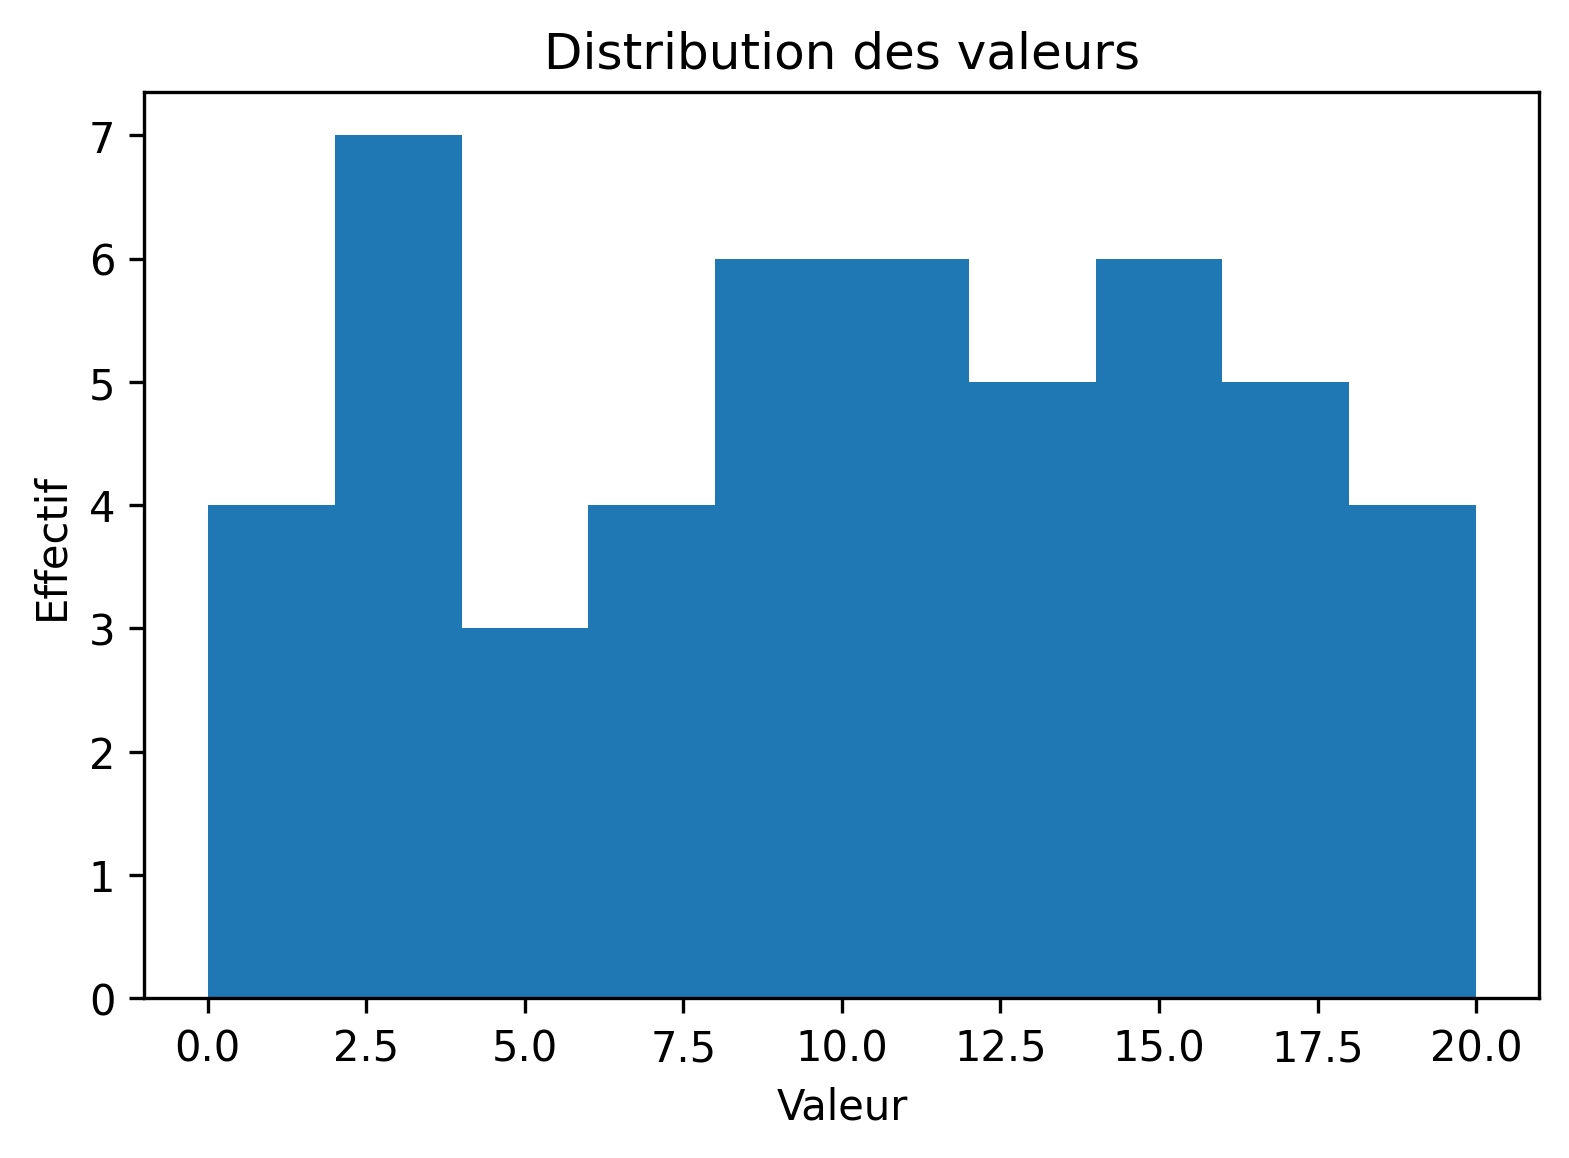

In [38]:
# Production de l'histogramme 
# Le second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la place, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, [0,2,4,6,8,10,12,14,16,18,20])
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

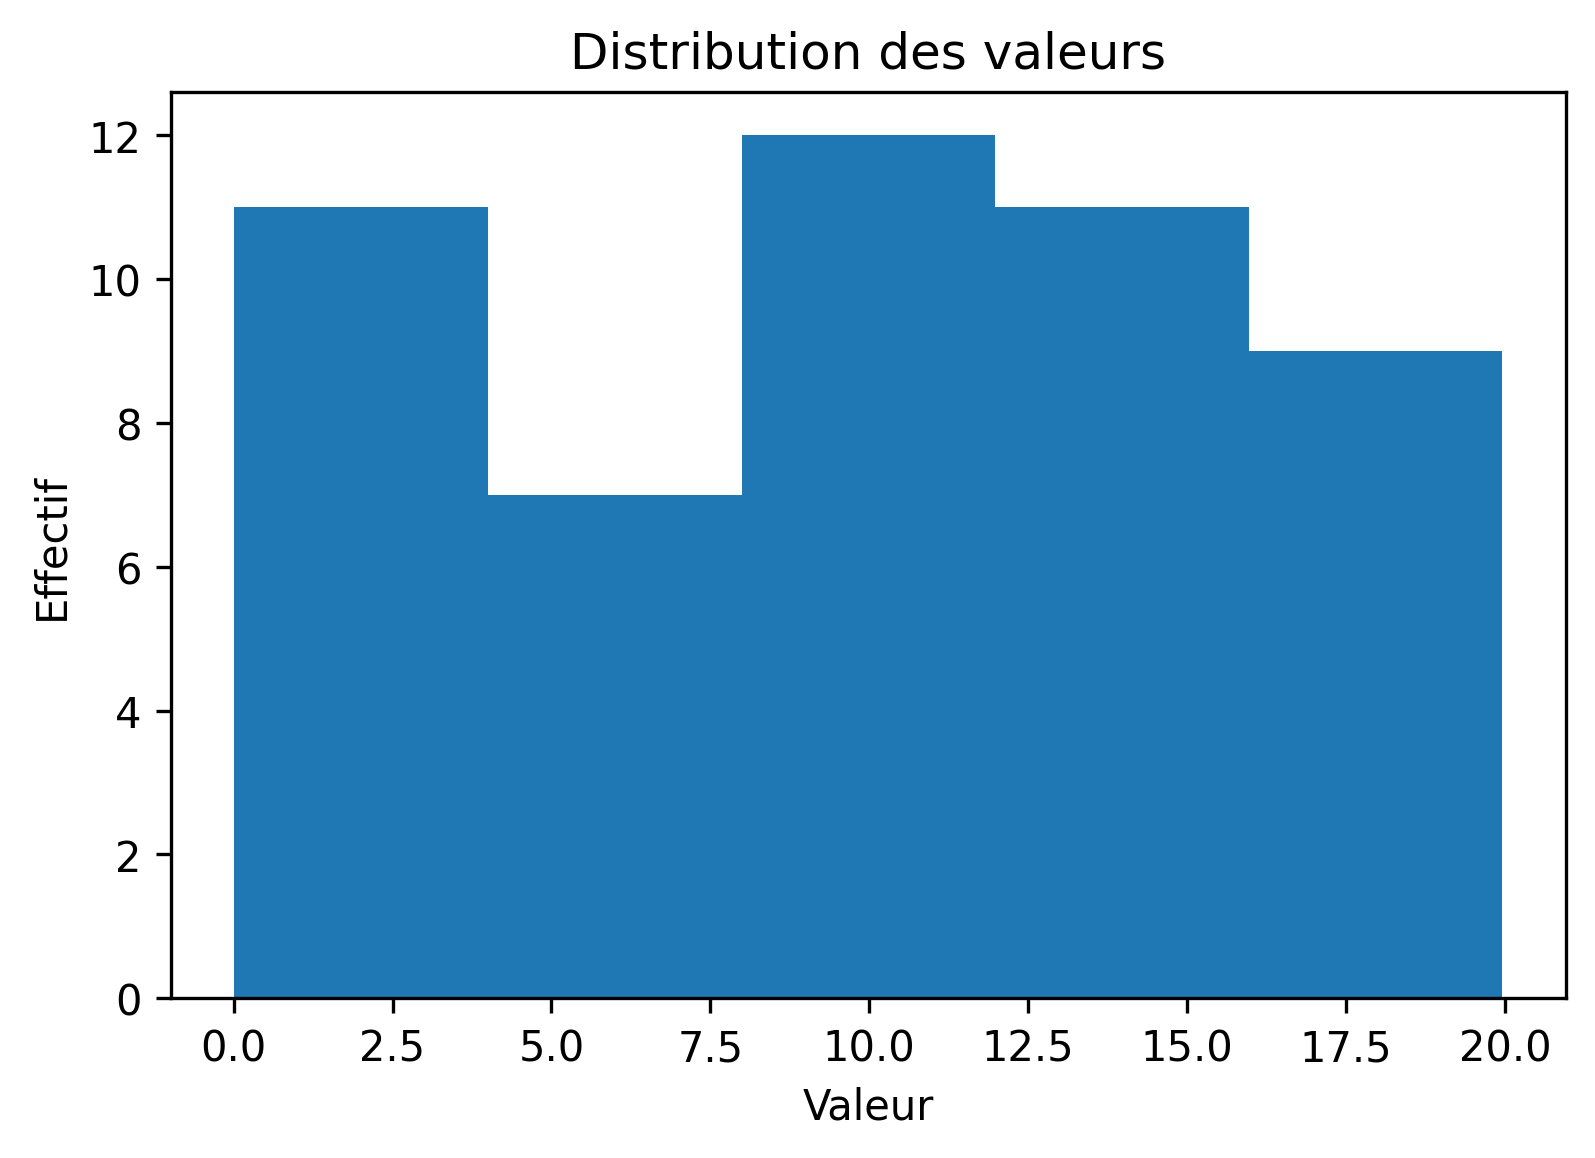

In [39]:
# Production de l'histogramme 
# Le second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la place, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, 5)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

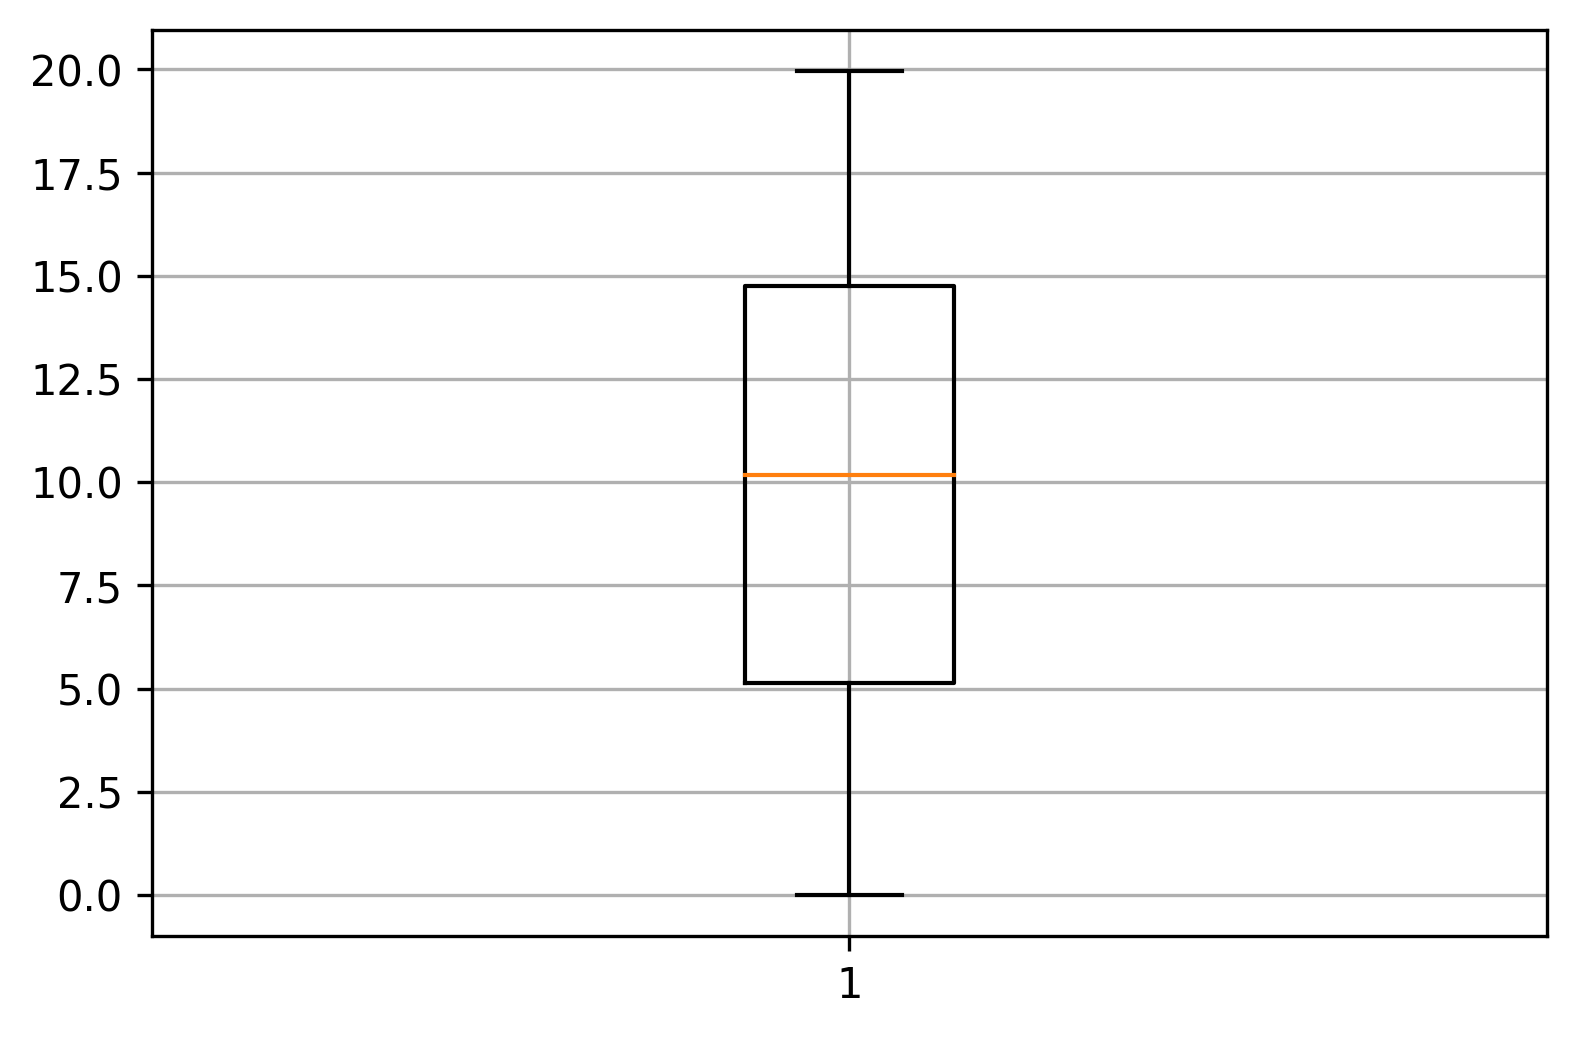

In [40]:
# Production du boxplot
fig = plt.figure()
plt.boxplot(data)
plt.grid()
# Affichage
plt.show()

### 3.4 Pour aller un peu plus loin (facultatif)

#### 3.4.1 Personnalisation

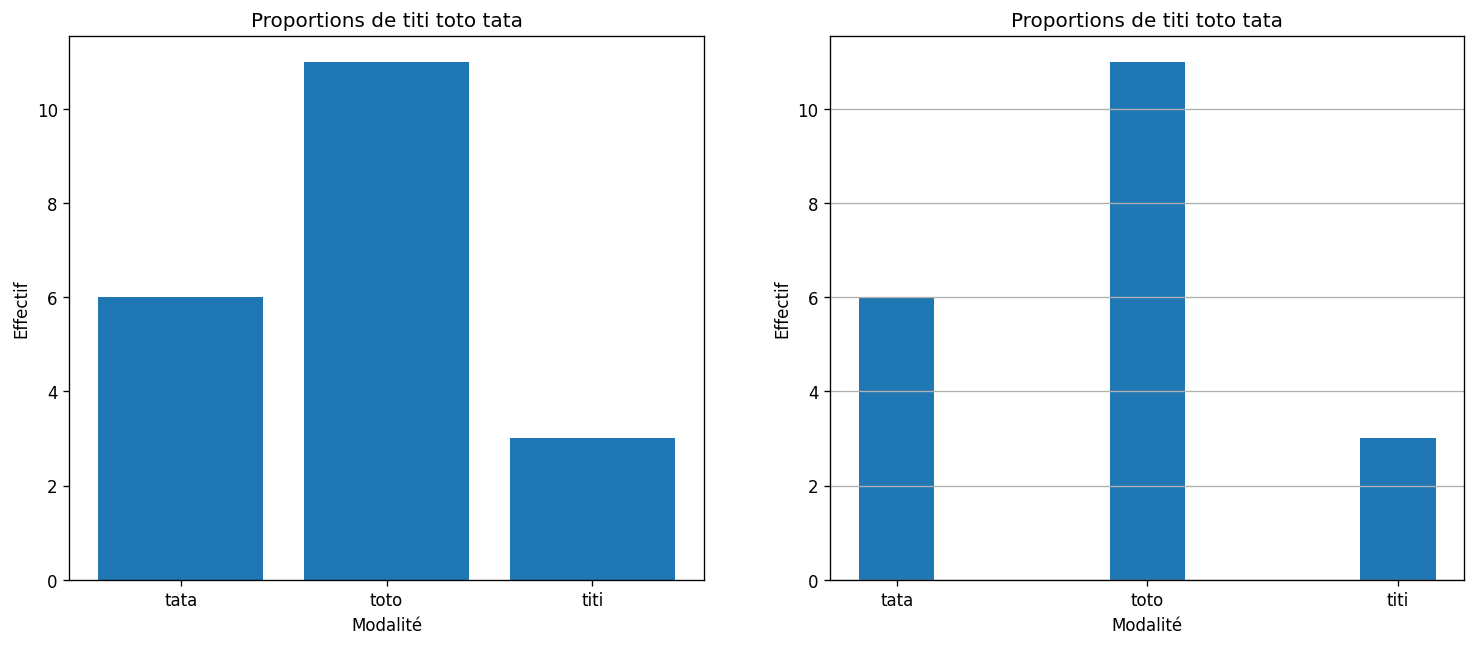

In [41]:
plt.figure(figsize=(15, 6), dpi=120)
heights = [data_gd[c][0] for c in classes]
plt.style.use('default')
# subplot permet de diviser une figure en un tableau de sous-figures
# le premier argument est le nombre de lignes de ce tableau, 
# le second le nombre de colonnes
# le troisième correspond au numéro de la cellule que l'on sélectionne
# ici :
#      +---+---+
#      | 1 | 2 |
#      +---+---+
#

# Premier graphique
plt.subplot(1, 2, 1)
plt.bar(classes, heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")

# Second graphique
plt.subplot(1, 2, 2)
plt.bar(classes, heights, width = 0.3)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
plt.grid(axis='y')

# Affichage
plt.show()

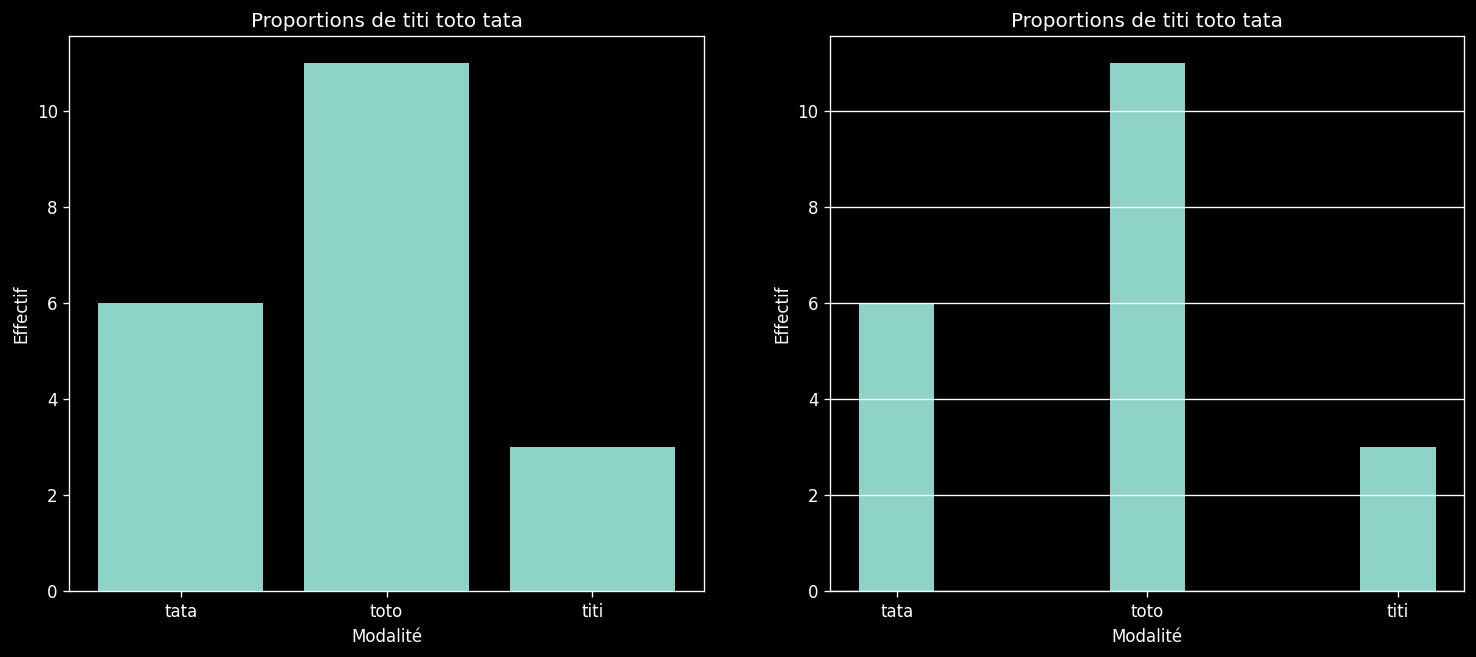

In [42]:


# Changement de style pour l'ensemble des graphiques à venir
plt.style.use('dark_background')
plt.figure(figsize=(15, 6), dpi=120)

plt.subplot(1, 2, 1)
plt.bar(classes, heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")

plt.subplot(1, 2, 2)
plt.bar(classes, heights, width = 0.3)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
plt.grid(axis='y')

plt.show()

# Restaurer le style pour les graphiques suivants
plt.style.use('default')
plt.rcParams["figure.dpi"] = 300

## 4 Problèmes et mise en pratique

### 4.1 Représentations graphiques

In [43]:
# Dictionnaire contenant les données groupées
# clé : (a,b) ---> intervalle de note ]a,b] (sauf pour le premier où le 0 est inclus)
# valeur : n  ---> nombre de notes comprises dans l'intervalle
data = {(0,5):  18, 
        (5,10):  7, 
        (10,15):13, 
        (15,20):10}

In [44]:
mean_data = 0
n = 0
for key, val in data.items():
    mean_data += ((key[1] + key[0])/2) * val
    n += val
mean_data /= n
print(mean_data)

    

9.0625


In [45]:
data = [2.8, 2.9, 2.9, 3.1, 3.2, 3.4, 3.4, 3.5, 3.6, 3.8, 4.0, 4.0, 4.1, 4.3, 
        4.5, 4.7, 4.8, 4.8, 7.9, 8.2, 8.6, 8.7, 9.3, 9.4, 9.6, 12.8, 13.0, 
        13.1, 13.2, 13.2, 13.4, 13.7, 13.8, 13.9, 14.1, 14.1, 14.2, 14.7, 17.8, 
        18.1, 18.9, 19.0, 19.1, 19.1, 19.3, 19.6, 19.7, 19.9]

In [46]:
print(get_gdistr(cut(dat=data, split=[0,5,10,15,20])))
print(mean(data))

{'(15,20]': (10, 0.20833333333333334), '(0,5]': (18, 0.375), '(5,10]': (7, 0.14583333333333334), '(10,15]': (13, 0.2708333333333333)}
10.358333333333334


On observe que la moyenne est bien différente lorsqu'elle est calculée sur la base des données brutes.

### Problèmes liés à la moyenne et à la médiane

In [47]:
salaires_A = [1243, 1278, 120124, 1394, 1296, 1289, 1303, 1083, 1291, 1337,
              1075, 1361, 1259, 1138, 1188, 1217, 1164, 1535, 1283, 1275, 
              1146, 1196, 1237, 1191, 1389, 1210, 1067, 1094, 1249, 1239, 
              1262, 1294, 1360, 1276, 1208, 1234, 1091, 1306, 1089, 1148, 
              1185, 1192, 1186, 1075, 1057, 1221, 1291, 1421, 120099, 1348, 
              1089, 1171, 1290, 1071, 1235, 1202, 1304, 120118, 1396, 1293, 
              1280, 1225, 1237, 1297, 1242, 120029, 1179, 1115, 1105, 1146, 
              120044, 1296, 1268, 1288, 1102, 1123, 1308, 1244, 1099, 1147, 
              1098, 1406, 1275, 1206, 1377, 1243, 1152, 1138, 1205, 1132, 
              1221, 1370, 1328, 1138, 1279, 1081, 1109, 1316, 1291, 1213, 
              1159, 119901, 1148, 1090, 1288, 1234, 1241, 120016, 1326, 
              1165, 119917, 1148, 119949, 1133, 1019, 1212, 119925, 1281, 
              1367, 1102, 1241, 1188, 1281, 1389, 1092, 1163, 1227, 1191, 
              1228, 1056, 1106, 1151, 1162, 1229, 1334, 1243, 119959, 1208, 
              1177, 1217, 1133, 1364, 1147, 119931, 1149, 1211, 1181, 1213, 
              1389, 1199, 1249, 1291, 1137, 1055, 1211, 1307, 1141, 1098, 
              1048, 1238, 1071, 1277, 120116, 120047]

In [48]:
print(mean(salaires_A))

11357.810975609756


In [49]:
print(median(salaires_A))

1229


Un écart significatif entre la moyenne et la médiane dû à des valeurs extrêmes qui « faussent » le résultat et augmentent énormément la moyenne.

In [50]:
salaires_B = [119965, 1217, 1124, 1379, 1129, 120063, 119930, 1104, 120120, 1348, 120128, 
            1226, 1173, 120024, 120032, 119862, 120056, 1305, 119902, 120098, 1166, 1180, 
            1061, 119816, 119929, 1226, 119944, 119847, 120094, 1089, 1298, 1103, 1205, 
            119782, 119904, 119875, 119954, 120162, 1322, 120031, 1100, 1123, 990, 120020, 
            119851, 120098, 1121, 120070, 1372, 1299, 119926, 1192, 119870, 120020, 1293, 
            120003, 1242, 1343, 119999, 1063, 120056, 1306, 1230, 119825, 1308, 1289, 1172, 
            1122, 120096, 120014, 1358, 1248, 120010, 1137, 1184, 120202, 1088, 119818, 
            120066, 1103, 1109, 1259, 1323, 119762, 1113, 1152, 119969, 119783, 119934, 
            1220, 119896, 120023, 119893, 120191, 1219, 120027, 119874, 120152, 1337]

In [51]:
print(mean(salaires_B))

61192.28282828283


In [52]:
print(median(salaires_B))

119782


On observe encore une fois un écart important entre les deux valeurs. Cette fois-ci, ce sont des valeurs extrêmement basses et extrêmement hautes qui font que la moyenne n'est plus vraiment représentative de quoi que ce soit.

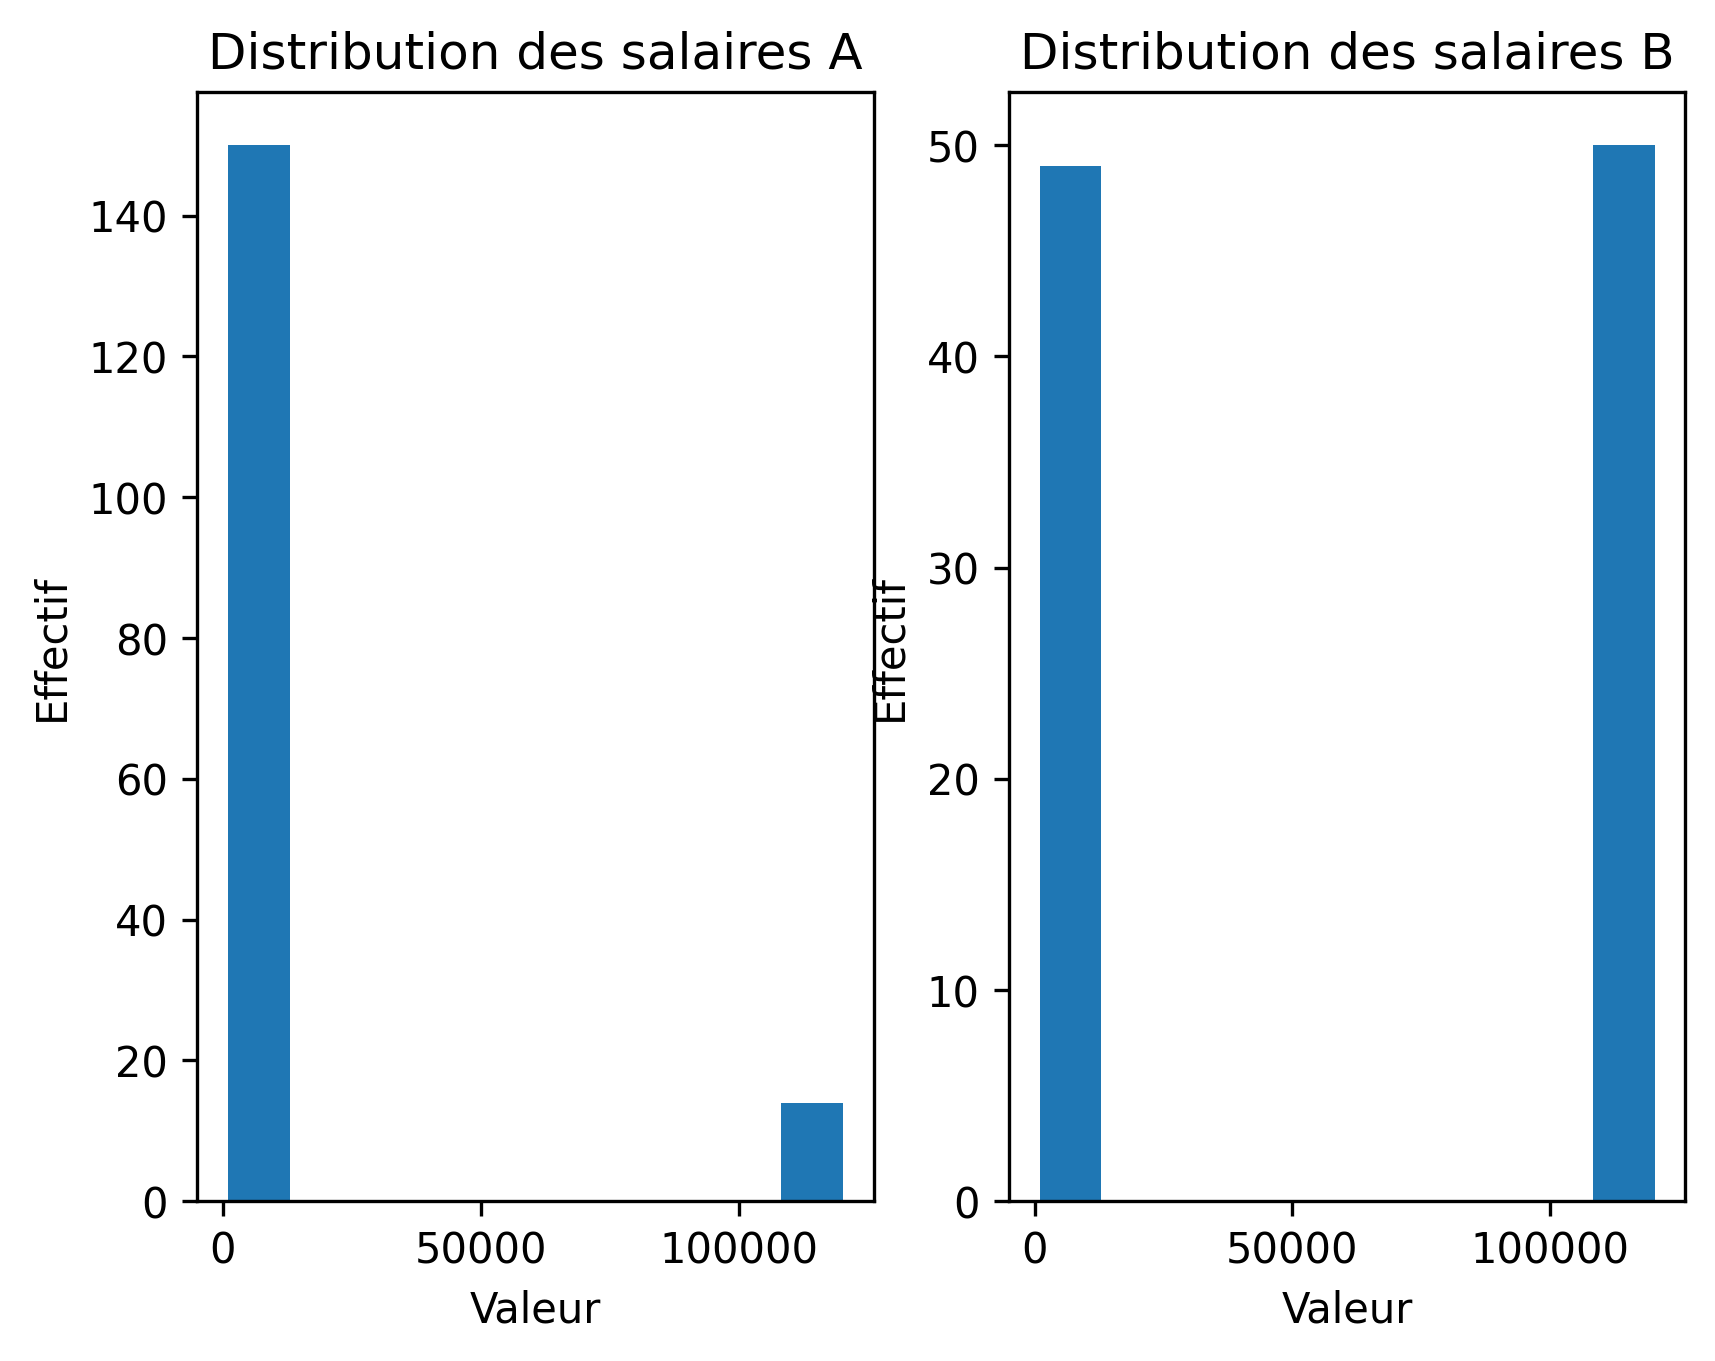

In [59]:
plt.subplot(1, 2, 1)
plt.hist(salaires_A, 10)
plt.title("Distribution des salaires A")
plt.ylabel("Effectif")
plt.xlabel("Valeur")

plt.subplot(1, 2, 2)
plt.hist(salaires_B, 10)
plt.title("Distribution des salaires B")
plt.ylabel("Effectif")
plt.xlabel("Valeur")

plt.show()

En résumé, on a une série avec beaucoup de valeurs basses et un peu de valeurs hautes d'un côté, et de l'autre une série où les valeurs sont assez équitablement réparties sur les extrêmes.

## 5 Transformation d'une variable

### 5.1 Transformation logarithmique

In [62]:
data = [1.65, 3.67, 1.96, 0.77, 0.45, 2.25, 0.47, 7.93, 0.77, 1.01,
        0.53, 0.31, 0.25, 0.55, 0.14, 0.27, 4.05, 3.11, 0.27, 1.27, 
        2.33, 9.81, 1.07, 0.02, 0.55, 1.93, 0.09, 2.35, 6.16, 0.05, 
        0.02, 7.17, 11.55, 3.21, 1.36, 7.97, 0.3, 1.82, 2.0, 0.02, 
        2.12, 1.02, 0.49, 0.17, 0.03, 2.36, 0.08, 0.51, 0.09, 0.94, 
        2.71, 0.29, 8.55, 0.47, 10.14, 1.04, 2.01, 0.39, 1.07, 1.64, 
        4.23, 2.11, 0.08, 0.1, 0.01, 1.5, 7.66, 0.07, 0.37, 2.75, 
        1.64, 0.84, 0.01, 0.3, 2.97, 6.28, 0.29, 0.02, 0.03, 4.68, 
        0.61, 5.73, 1.08, 5.03, 8.55, 1.52, 4.55, 0.47, 0.28, 0.39, 
        1.16, 1.3, 0.08, 1.96, 0.76, 0.21, 0.43, 6.64, 7.05, 0.01]

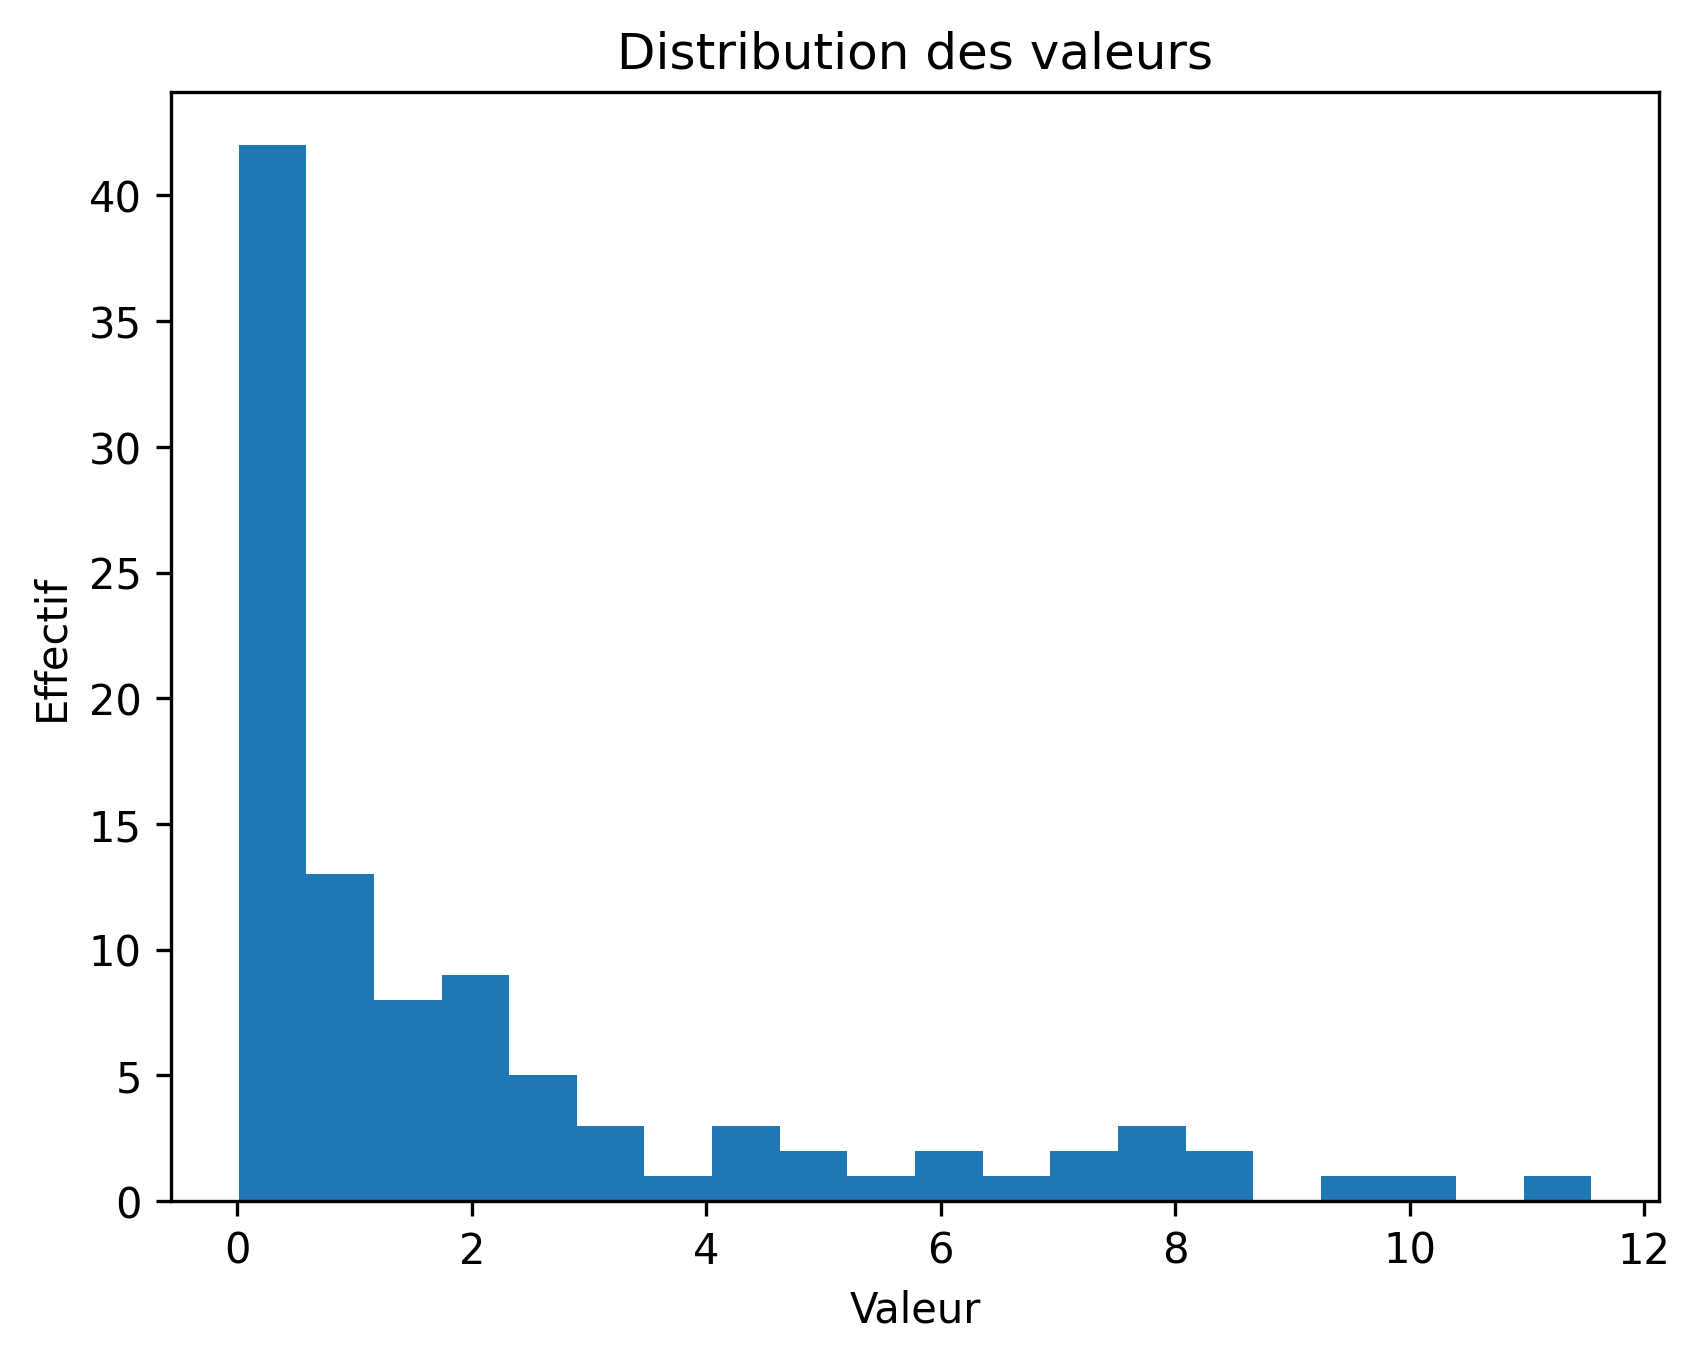

In [64]:
plt.hist(data, 20)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

In [65]:
import math

data_log = [math.log(x) for x in data]

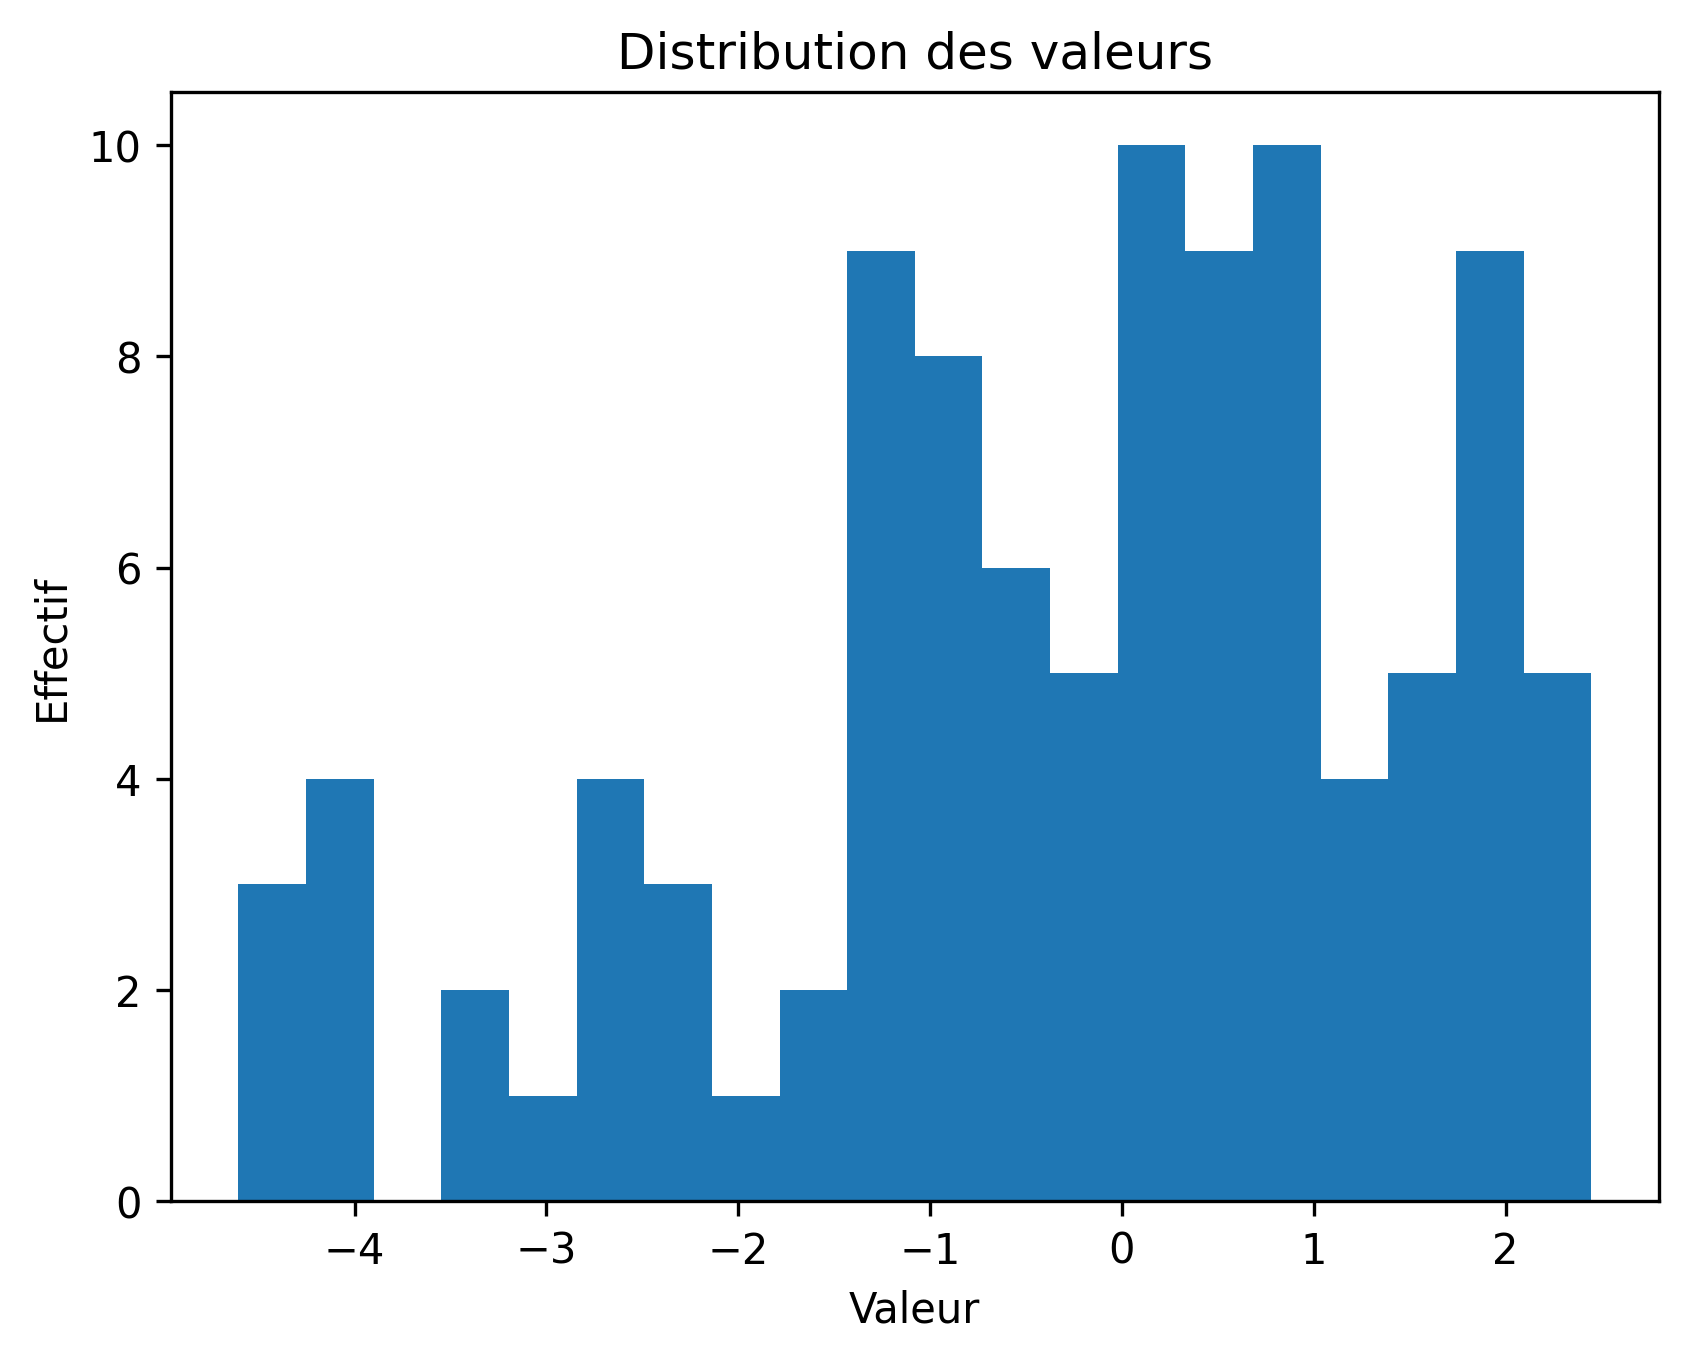

In [68]:
plt.hist(data_log, 20)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

En utilisant la fonction logarithme, la distribution semble différente et on voit plus en détail les différences dans les valeurs comprises entre 0 et 1

### 5.2 Transformation en rangs

In [69]:
def to_ranks(data):
    sorted_data = sorted(data)
    return [sorted_data.index(x) + 1 for x in data]

In [70]:
to_ranks([3,8,1,11,7,4])

[2, 5, 1, 6, 4, 3]

In [71]:
data = [9.4531, 11.6358, 11.0114, 13.6833, 22.5199, 6.9069, 9.6858, 10.1612, 9.6639, 13.7164, 
        -0.1524, 9.3856, 5.6784, 12.4886, 4.4473, 9.5456, 10.3225, 13.1786, 13.4331, 5.8983, 
        9.9682, 9.1689, 8.3763, 8.3065, 11.2544, 3.9533, 13.1199, 9.8712, 9.3393, 10.1274, 
        8.3552, 14.1878, 4.4704, 6.5326, 14.853, 12.9896, 16.5132, 6.4729, 14.0004, 16.0347, 
        7.4854, 10.9724, 8.6938, 14.3512, 13.6721, 12.412, 16.6542, 7.3041, 17.4611, 10.977, 
        7.8374, 13.8277, 4.136, 5.4403, 11.4788, 10.3844, 14.0403, 5.1948, 3.6954, 8.7836, 
        7.0702, 9.4915, 13.9402, 9.4944, 12.3044, 12.7221, 14.4586, 11.0558, 12.657, 13.5342, 
        14.2622, 8.9576, 12.7594, 16.9846, 18.5019, 6.4132, 7.3614, 13.0121, 10.0488, 5.572, 
        8.7635, 7.2641, 12.6194, 16.1174, 6.9511, 9.6203, 12.4084, 10.3873, 10.1446, 13.3794, 
        9.9577, 10.2323, 7.4461, 8.7361, 15.8436, 9.0257, 13.1165, 10.529, 7.8485, 8.843]

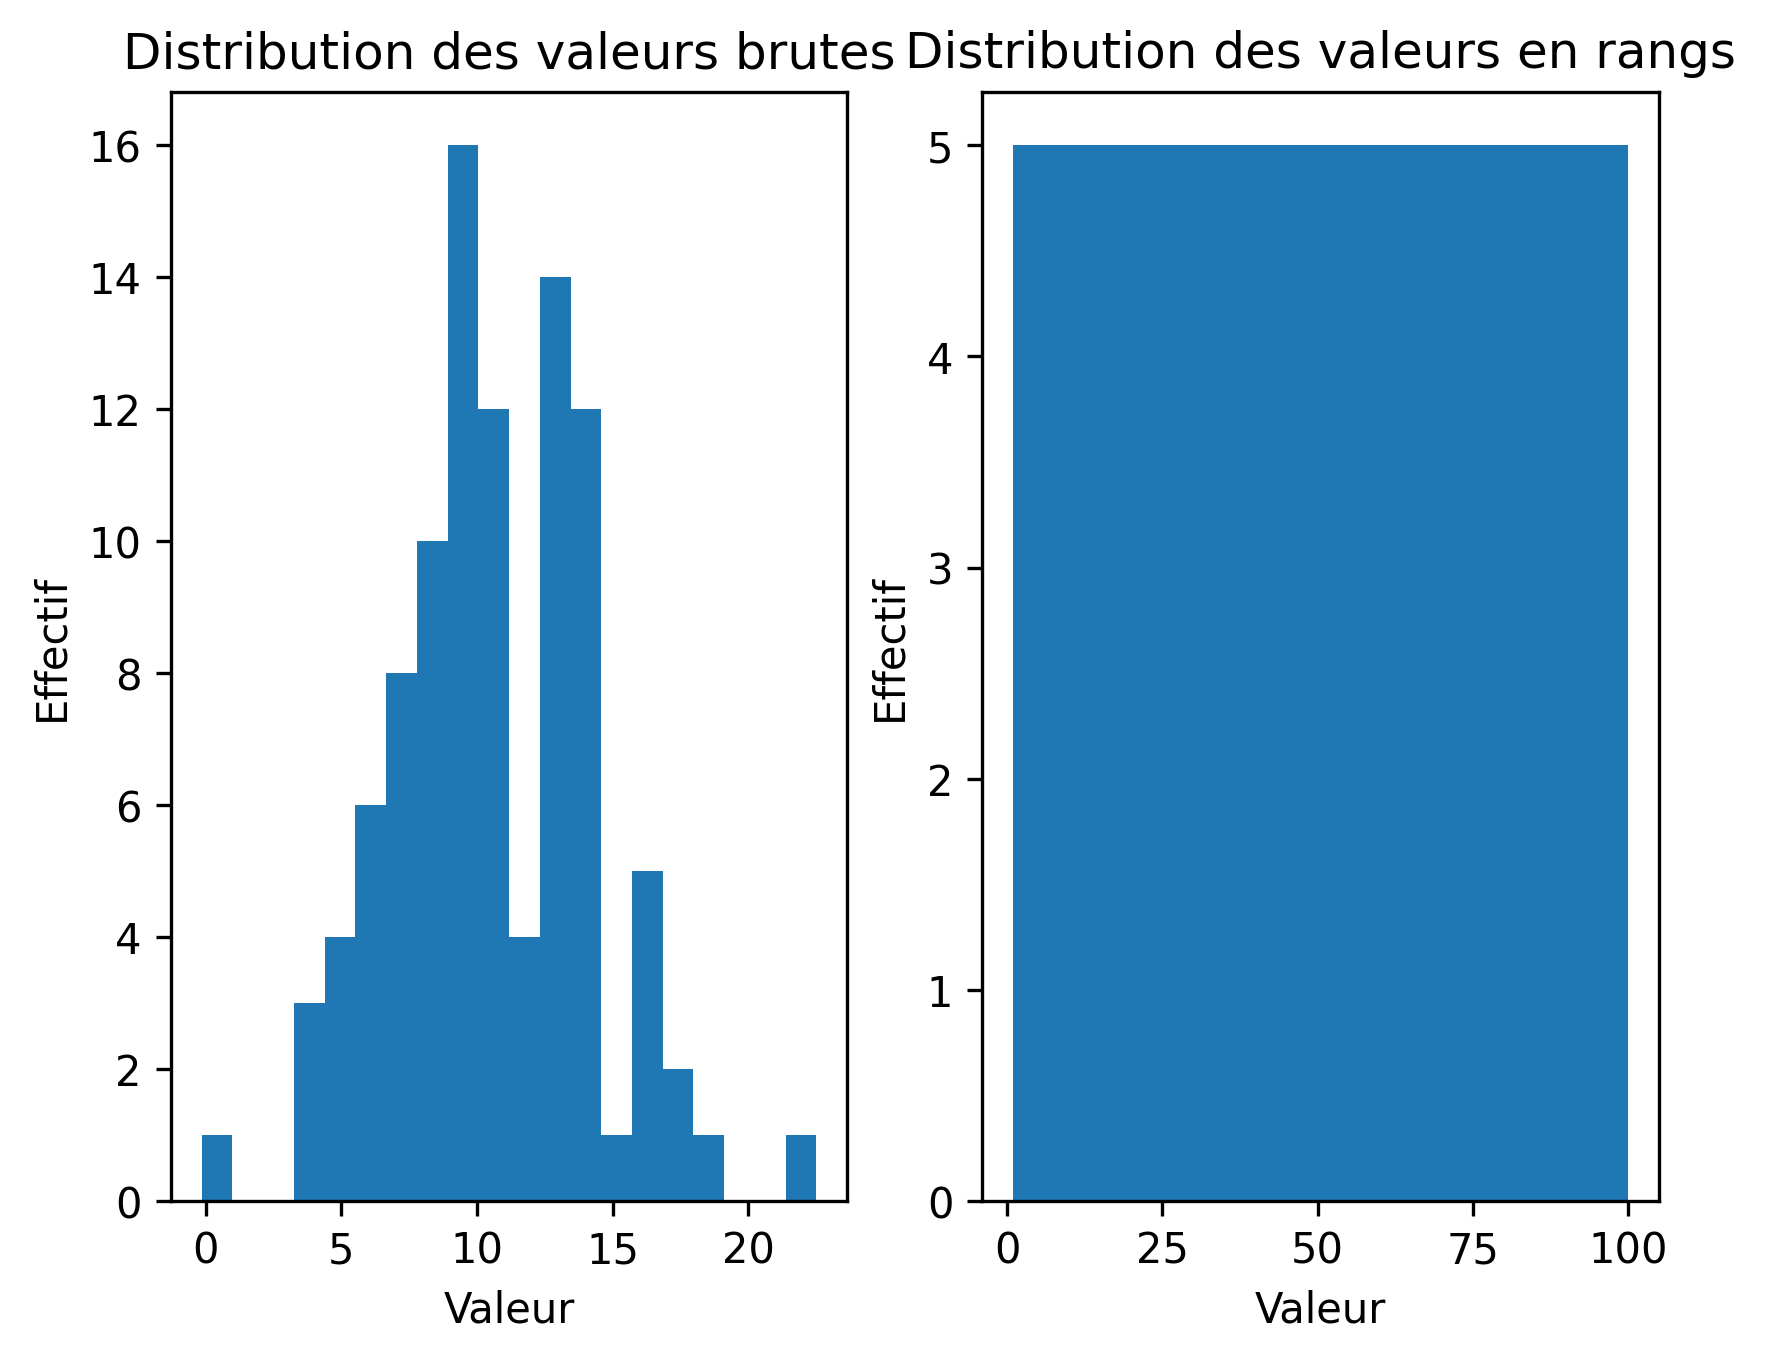

In [75]:
plt.subplot(1, 2, 1)
plt.hist(data, 20)
plt.title("Distribution des valeurs brutes")
plt.ylabel("Effectif")
plt.xlabel("Valeur")

plt.subplot(1, 2, 2)
plt.hist(to_ranks(data), 20)
plt.title("Distribution des valeurs en rangs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")

plt.show()

Lorsque mises en rang, les valeurs vont avoir une distribution complètement équitable (ou quasiment, dans le cas où on aurait plusieurs fois une valeur identique).

### 5.3 Centrage et réduction

In [76]:
data = [6.6, 8.9, 11.6, 5.5, 7.8, 13.3, 14.7, 6.8, 8.8, 19.5, 
        14.1, 9.7, 10.4, 11.0, 15.2, 16.4, 15.4, 13.3, 9.2, 10.7, 
        9.4, 11.8, 13.2, 15.9, 12.3, 15.6, 12.0, 5.7, 18.7, 15.6, 
        13.7, 16.2, 6.9, 13.4, 15.3, 21.0, 11.5, 17.8, 13.5, 15.5, 
        10.8, 18.0, 0.0, 9.4, 12.7, 12.4, 16.0, 4.2, 16.2, 3.5, 
        9.8, 11.6, 15.3, 8.9, 9.5, 16.8, 10.8, 15.2, 11.0, 11.3, 
        11.5, 13.7, 11.1, 19.3, 20.9, 7.9, 9.7, 11.4, 9.8, 18.7, 
        14.3, 17.3, 9.9, 16.6, 11.2, 19.0, 13.7, 13.8, 17.9, 9.6, 
        16.7, 19.7, 10.1, 9.4, 13.9, 5.0, 16.1, 10.9, 9.9, 14.0, 
        5.0, 7.9, 25.6, 11.6, 15.2, 15.7, 11.4, 5.8, 16.0, 14.2]

In [77]:
print(f"Moyenne    : {mean(data)}")
print(f"Écart-Type : {stdev(data)}")

Moyenne    : 12.587
Écart-Type : 4.2989453357771374


Text(0.5, 0, 'Valeur')

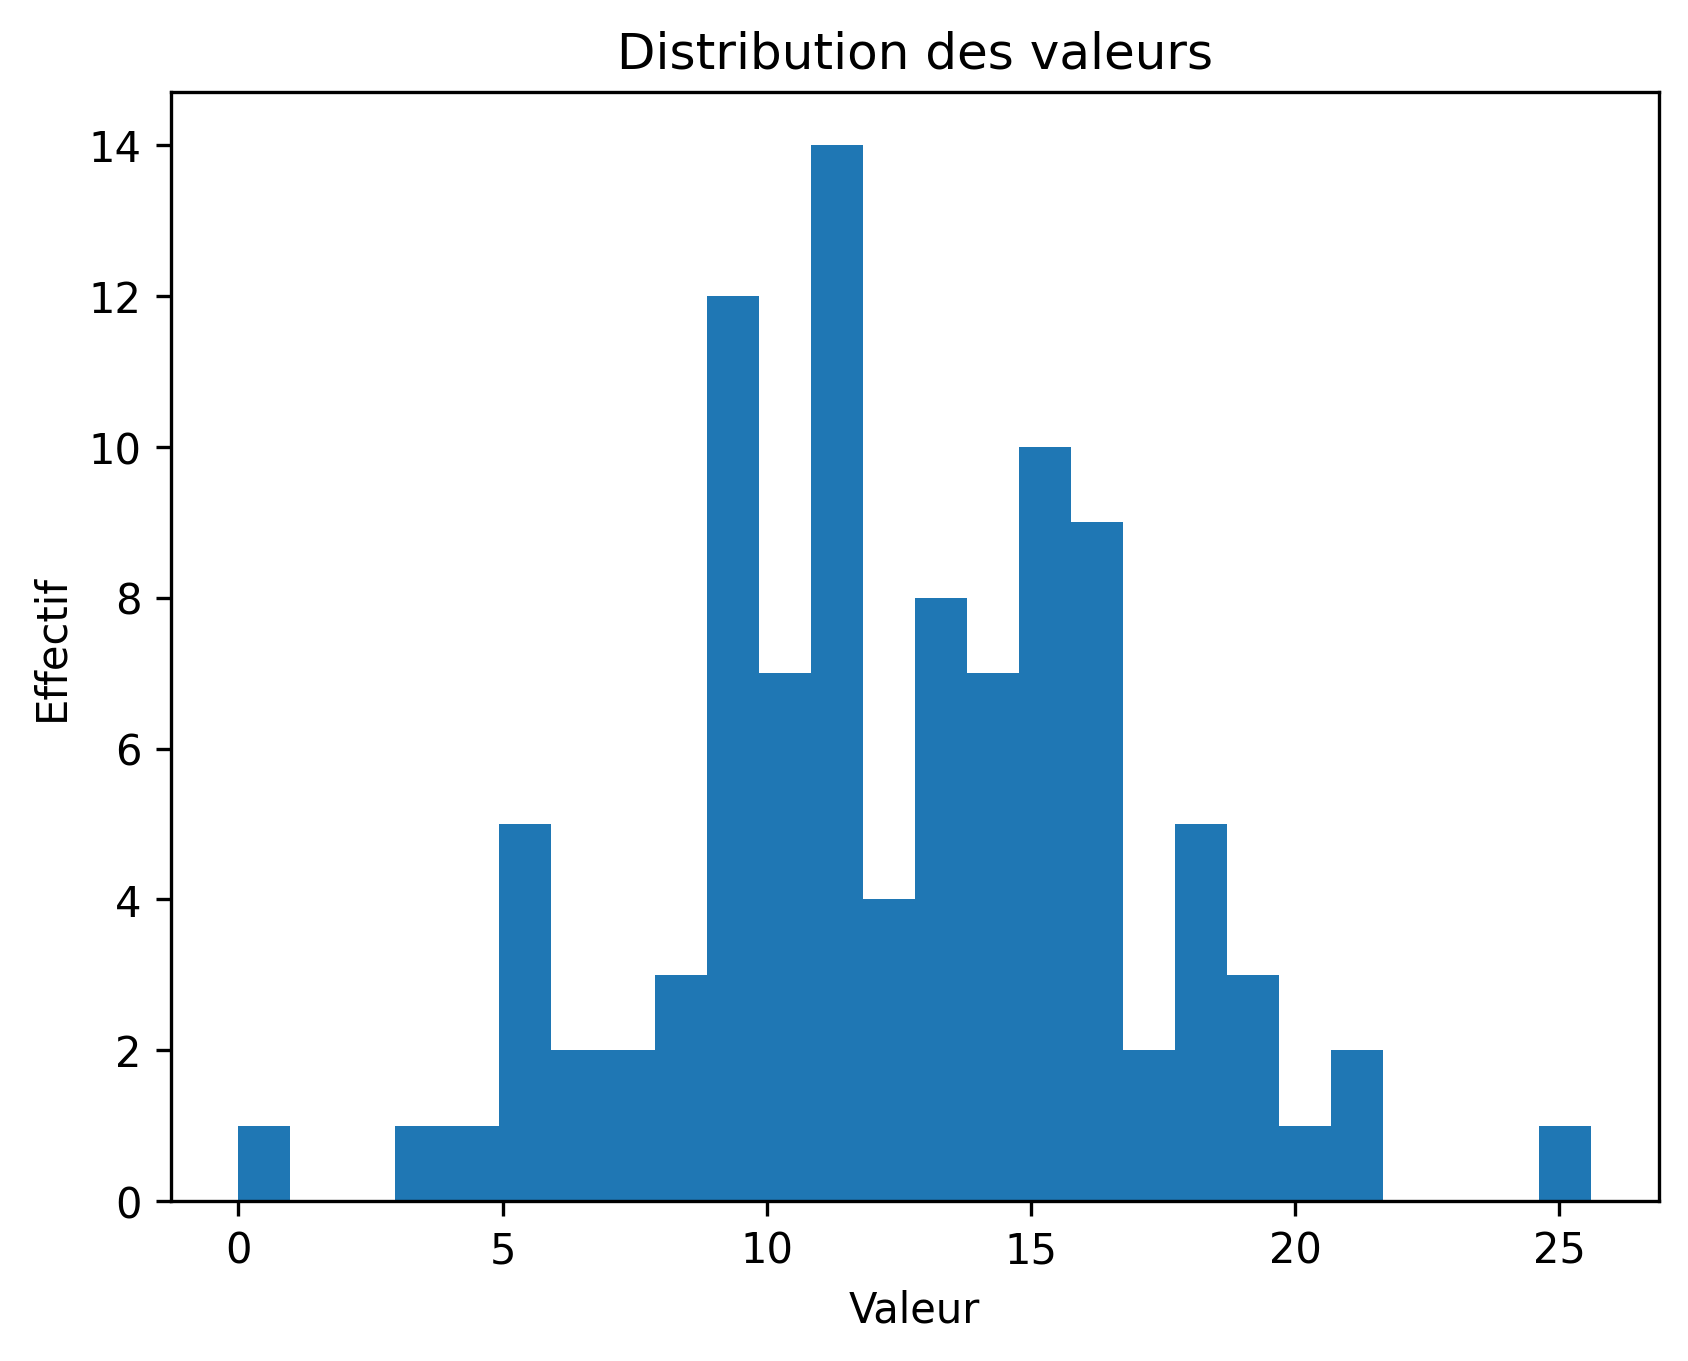

In [79]:
plt.hist(data, 26)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")

In [84]:
def scale(data: list, center=True, scale=True):
    new_data = data.copy()

    if center:
        data_mean = mean(data)
        for i in range(len(new_data)):
            new_data[i] -= data_mean
            
    if scale:
        data_stdev = stdev(data)
        for i in range(len(new_data)):
            new_data[i] /= data_stdev
    
    return new_data

In [85]:
scale([0,1,2,3,4,5,6,7,8,9], center=True, scale=False)

[-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

In [86]:
scale([0,1,2,3,4,5,6,7,8,9], center=True, scale=True)

[-1.5666989036012806,
 -1.2185435916898848,
 -0.8703882797784892,
 -0.5222329678670935,
 -0.17407765595569785,
 0.17407765595569785,
 0.5222329678670935,
 0.8703882797784892,
 1.2185435916898848,
 1.5666989036012806]

Text(0.5, 0, 'Valeur')

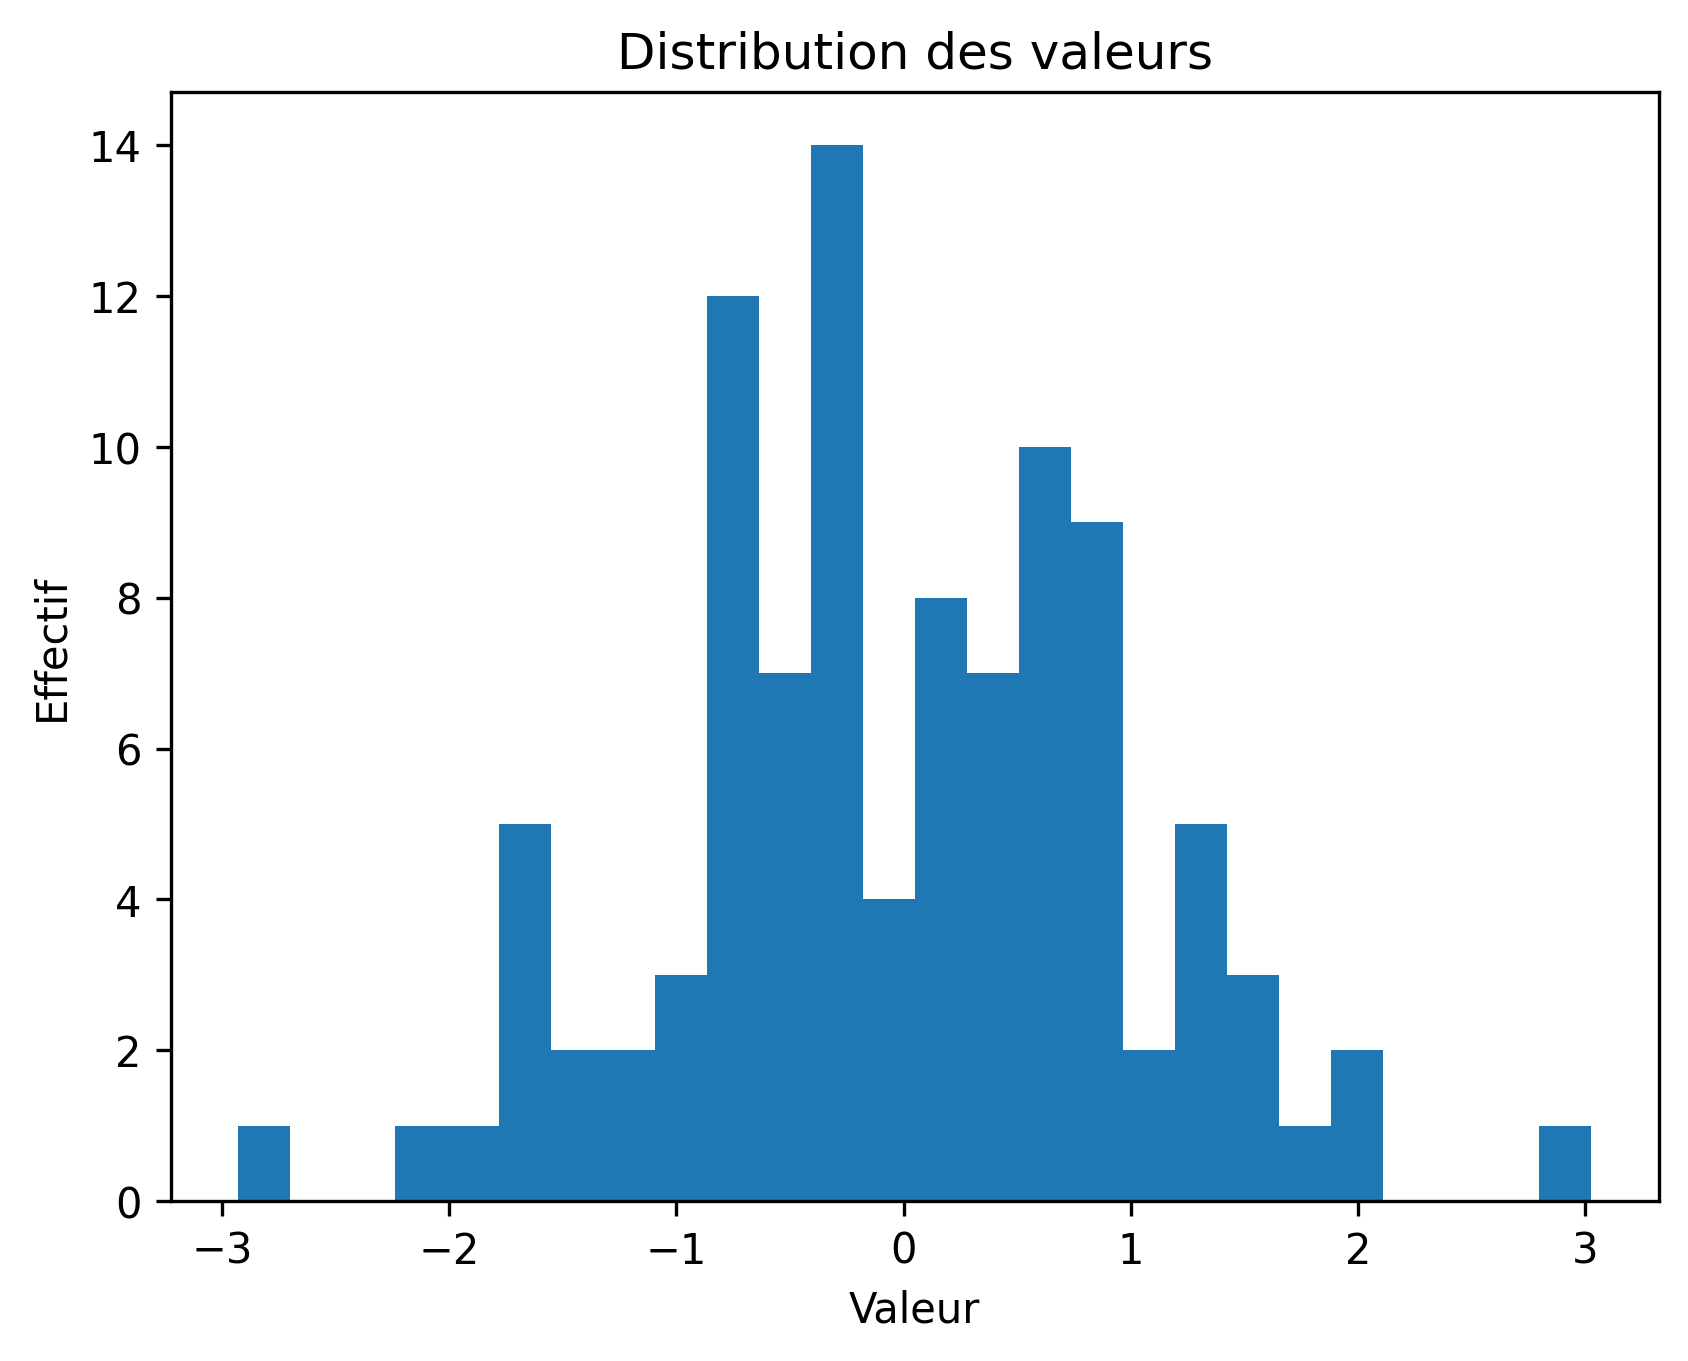

In [87]:
scaled_data = scale(data)
plt.hist(scaled_data, 26)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")